In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
def my_loss_function(y_true, y_pred):
    per_class_accuracies = []
    conf_mat = confusion_matrix(y_true, y_pred)
    for i in range(len(conf_mat)):
        class_predictions = conf_mat[i]
        samples_in_class = np.sum(class_predictions)
        num_predictions = conf_mat[i, i]
        class_accuracy = num_predictions / float(samples_in_class)
        per_class_accuracies.append(class_accuracy)
    per_class_accuracies = np.array(per_class_accuracies)
    average_per_class_acc = per_class_accuracies.mean()
    return average_per_class_acc

In [4]:
def average_per_class_acc(conf_mat):
    per_class_accuracies = []
    for i in range(len(conf_mat)):
        class_predictions = conf_mat[i]
        samples_in_class = np.sum(class_predictions)
        num_predictions = conf_mat[i, i]
        class_accuracy = num_predictions / float(samples_in_class)
        per_class_accuracies.append(class_accuracy)
    per_class_accuracies = np.array(per_class_accuracies)
    average_per_class_acc = per_class_accuracies.mean()
    return average_per_class_acc

In [11]:
logitParams = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
score = make_scorer(my_loss_function, greater_is_better=True)
for i in range(1, 13):
    print("i =", i)
    X_train = pd.read_csv('datasets/{}_X_train.csv'.format(i), low_memory=False)
    X_test = pd.read_csv('datasets/{}_X_test.csv'.format(i), low_memory=False)
    y_train = pd.read_csv('datasets/{}_y_train.csv'.format(i), low_memory=False, header=None)
    y_test = pd.read_csv('datasets/{}_y_test.csv'.format(i), low_memory=False, header=None)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    y_train = pd.Series(y_train[0])
    y_test = pd.Series(y_test[0])
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print()
    
    clf = GridSearchCV(LogisticRegression(), param_grid=logitParams, cv=3, scoring=score, verbose=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Baseline:")
    print(accuracy_score(y_pred=np.zeros(len(y_test)), y_true=y_test))
    print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=y_pred))
    print("Average-per class accuracy:", average_per_class_acc(conf_mat))
    print("Confusion matrix:")
    print(conf_mat)
    print()    

i = 1
(16750, 998) (8250, 998) (16750, 1) (8250, 1)
(16750, 998) (8250, 998) (16750,) (8250,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   21.2s finished


Baseline:
0.888848484848
Accuracy:  0.885212121212
Confusion matrix:
[[7268   65]
 [ 882   35]]
Average-per class accuracy: 0.514651949828

i = 2
(16750, 998) (8250, 998) (16750, 1) (8250, 1)
(16750, 998) (8250, 998) (16750,) (8250,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   22.4s finished


Baseline:
0.892121212121
Accuracy:  0.884606060606
Confusion matrix:
[[7269   91]
 [ 861   29]]
Average-per class accuracy: 0.510110069614

i = 3
(16750, 999) (8250, 999) (16750, 1) (8250, 1)
(16750, 999) (8250, 999) (16750,) (8250,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   21.8s finished


Baseline:
0.889212121212
Accuracy:  0.884484848485
Confusion matrix:
[[7270   66]
 [ 887   27]]
Average-per class accuracy: 0.510271876469

i = 4
(382434, 9) (187970, 9) (382434, 1) (187970, 1)
(382434, 9) (187970, 9) (382434,) (187970,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.7min finished


Baseline:
0.885614725754
Accuracy:  0.885513645795
Confusion matrix:
[[166315    154]
 [ 21366    135]]
Average-per class accuracy: 0.502676840283

i = 5
(389599, 9) (191516, 9) (389599, 1) (191516, 1)
(389599, 9) (191516, 9) (389599,) (191516,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  3.0min finished


Baseline:
0.887774389607
Accuracy:  0.887784832599
Confusion matrix:
[[169948     75]
 [ 21416     77]]
Average-per class accuracy: 0.501570722487

i = 6
(389556, 9) (191344, 9) (389556, 1) (191344, 1)
(389556, 9) (191344, 9) (389556,) (191344,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.6min finished


Baseline:
0.887934818965
Accuracy:  0.88798708086
Confusion matrix:
[[169786    115]
 [ 21318    125]]
Average-per class accuracy: 0.502576271718

i = 7
(382464, 26) (188120, 26) (382464, 1) (188120, 1)
(382464, 26) (188120, 26) (382464,) (188120,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.3min finished


Baseline:
0.884860727195
Accuracy:  0.884956410802
Confusion matrix:
[[166305    155]
 [ 21487    173]]
Average-per class accuracy: 0.503527959157

i = 8
(389695, 26) (191497, 26) (389695, 1) (191497, 1)
(389695, 26) (191497, 26) (389695,) (191497,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.4min finished


Baseline:
0.887460377969
Accuracy:  0.887418601858
Confusion matrix:
[[169829    117]
 [ 21442    109]]
Average-per class accuracy: 0.502184657981

i = 9
(389583, 26) (191552, 26) (389583, 1) (191552, 1)
(389583, 26) (191552, 26) (389583,) (191552,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.8min finished


Baseline:
0.888019963248
Accuracy:  0.887967758102
Confusion matrix:
[[169984    118]
 [ 21342    108]]
Average-per class accuracy: 0.502170631804

i = 10
(16750, 1009) (8250, 1009) (16750, 1) (8250, 1)
(16750, 1009) (8250, 1009) (16750,) (8250,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 20.8min finished


Baseline:
0.886787878788
Accuracy:  0.874787878788
Confusion matrix:
[[7171  145]
 [ 888   46]]
Average-per class accuracy: 0.514715480897

i = 11
(16750, 1004) (8250, 1004) (16750, 1) (8250, 1)
(16750, 1004) (8250, 1004) (16750,) (8250,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 23.2min finished


Baseline:
0.887878787879
Accuracy:  0.878909090909
Confusion matrix:
[[7220  105]
 [ 894   31]]
Average-per class accuracy: 0.509589521262

i = 12
(16750, 1001) (8250, 1001) (16750, 1) (8250, 1)
(16750, 1001) (8250, 1001) (16750,) (8250,)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 21.4min finished


Baseline:
0.888121212121
Accuracy:  0.880606060606
Confusion matrix:
[[7243   84]
 [ 901   22]]
Average-per class accuracy: 0.506185436521



---

### Generating correlation matrix

In [5]:
i = 4

X_train = pd.read_csv('datasets/{}_X_train.csv'.format(i), low_memory=False)
X_test = pd.read_csv('datasets/{}_X_test.csv'.format(i), low_memory=False)
y_train = pd.read_csv('datasets/{}_y_train.csv'.format(i), low_memory=False, header=None)
y_test = pd.read_csv('datasets/{}_y_test.csv'.format(i), low_memory=False, header=None)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = pd.Series(y_train[0])
y_test = pd.Series(y_test[0])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()

(382434, 9) (187970, 9) (382434, 1) (187970, 1)
(382434, 9) (187970, 9) (382434,) (187970,)



In [6]:
train_data = pd.concat([X_train, y_train], axis=1)

In [7]:
train_data.shape

(382434, 10)

In [14]:
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
train_data.rename(columns={0: 'ARRIVAL_DELAY_BIN_30'}, inplace=True)

In [15]:
train_data.columns

Index(['SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'DAY_OF_YEAR_WOE', 'DAY_OF_WEEK_WOE',
       'AIRLINE_WOE', 'ORIGIN_WOE', 'DESTINATION_WOE', 'ARRIVAL_DELAY_BIN_30'],
      dtype='object')

In [16]:
corr = train_data.corr()

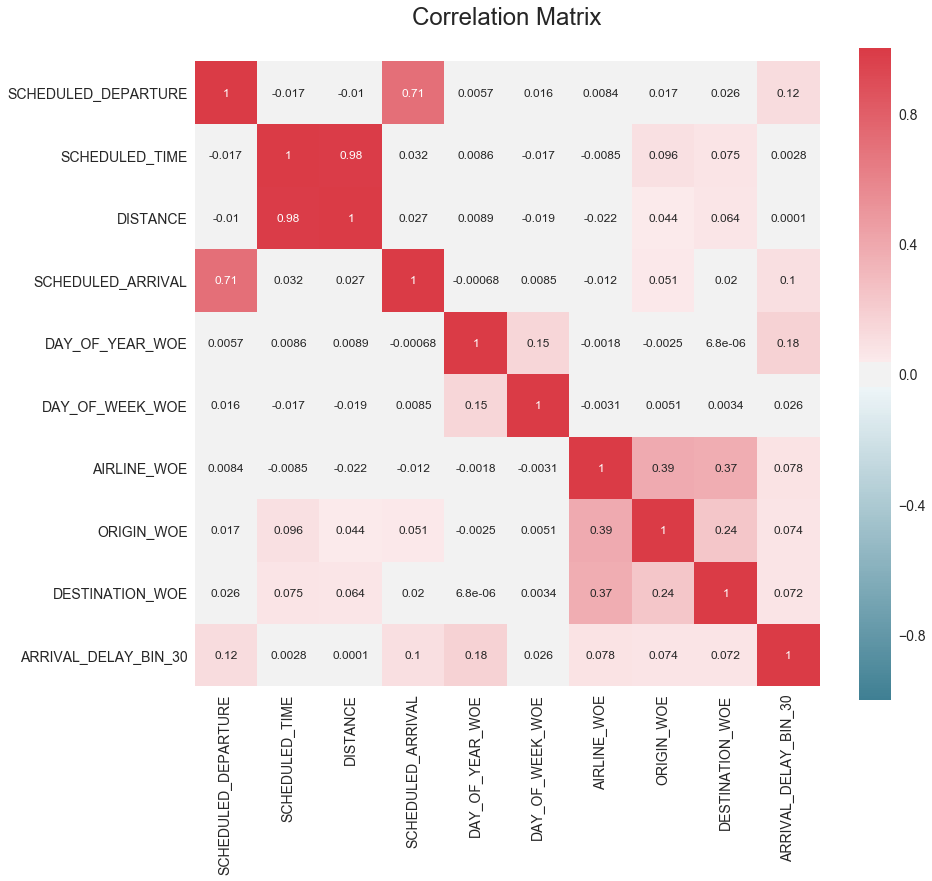

In [41]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(14,12))
plt.title('Correlation Matrix', y=1.05, size=24)
sns.set(font_scale=1.4)
sns.heatmap(corr, cmap=cmap, vmax=1.0, square=True, linecolor='white', annot=True, annot_kws={"size":12})
print()